## Forecasting Vaccine Uptake: A Data-Driven Approach

![image](H1N1.jpg)

## Author : MIKE KIPTOCH

## NoteBook Structure
i) Business Understanding<br>
ii) Data Understanding<br>
iii) Data Preparation<br>
iv) Modeling<br>
v) Evaluation<br>
vi) Conclusion<br>
vii) Recommendation<br>
v) Next Steps<br>

## Business Understanding

Vaccination stands as one of humanity's greatest achievements in public health, having effectively eradicated or controlled numerous diseases. However, recent years have witnessed a concerning rise in vaccine skepticism, leading to declining immunization rates and outbreaks of preventable diseases. Understanding the factors driving vaccine hesitancy and predicting vaccination uptake is imperative for public health officials and policymakers.

This project leverages data from the National Flu Survey (NHFS 2009) to predict individuals' likelihood of receiving the H1N1 flu vaccine. By examining past vaccination patterns, the study aims to shed light on contemporary vaccination behaviors, particularly pertinent in the context of emerging pandemics like COVID-19.

## Problem Statement

Vaccine hesitancy poses a significant challenge to public health efforts, leading to decreased immunization rates and increased vulnerability to infectious diseases. Understanding the factors influencing individuals' decisions regarding vaccine uptake is crucial for designing effective interventions and promoting community immunity. In this context, the project aims to predict the likelihood of individuals receiving the H1N1 flu vaccine using machine learning techniques and data from the National Flu Survey (NHFS 2009).

## Objectives

- Prediction: Develop machine learning models to predict individuals' H1N1 vaccine uptake based on demographic, socio-economic, and attitudinal factors.

- Identify Influential Factors: Determine the most influential factors affecting H1N1 vaccine acceptance, including doctor recommendations, health insurance coverage, perceptions of vaccine effectiveness, and risk perceptions related to H1N1.

- Model Evaluation: Assess the performance of different machine learning algorithms, including Decision Tree Classifier, Logistic Regression, Random Forest, K-Nearest Neighborhood Classifier, Gradient Boosting Classifier, and XG Boosting Classifier, in predicting H1N1 vaccine uptake.

- Impact Analysis: Analyze the implications of the predictive models and identify actionable insights for public health professionals and policymakers to improve vaccination rates.

## Description of Data Source

The dataset utilized in this project comprises 10 columns and 26,708 rows, sourced from Kaggle. This dataset originates from the National Flu Survey (NHFS) of 2009, a comprehensive survey conducted to understand public attitudes and behaviors regarding influenza vaccination, specifically targeting the H1N1 flu vaccine.

## Data Preparation

In [9]:
# Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import category_encoders as ce

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost     # extreme gradient boosting

# To visualize the 100 many the columns in data
pd.options.display.max_columns=100

ModuleNotFoundError: No module named 'category_encoders'

In [10]:
# Load the dataset

df= pd.read_csv('H1N1_Flu_Vaccines.csv')

In [11]:
#display the 10  rows
df.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


In [16]:
# The target (seasonal flu rate) is explored
df['seasonal_vaccine'].value_counts(normalize=True)

seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64

In [17]:
# The percentage breakdown of the two classes in a possible target (H1N1 flu rate) is explored.
df['h1n1_vaccine'].value_counts(normalize=True)   # A class imbalance problem is observed.

h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

In [18]:
# check the shape
df.shape

(26707, 38)

In [19]:
# check data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [20]:
#checking value counts
vaccine_counts_h1n1 = df['h1n1_vaccine'].value_counts()
vaccine_counts_seasonal = df['seasonal_vaccine'].value_counts()

print("Value Counts for h1n1_vaccine:\n", vaccine_counts_h1n1)
print("\nValue Counts for seasonal_vaccine:\n", vaccine_counts_seasonal)


Value Counts for h1n1_vaccine:
 h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

Value Counts for seasonal_vaccine:
 seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64


H1N1 Flu Vaccine:

- 21,033 respondents did not receive the H1N1 flu vaccine.
- 5,674 respondents received the H1N1 flu vaccine.
Seasonal Flu Vaccine:

- 14,272 respondents did not receive the seasonal flu vaccine.
- 12,435 respondents received the seasonal flu vaccine.

- The value counts indicate that the distribution of respondents across the "seasonal_vaccine" classes is more balanced compared to the distribution across the "h1n1_vaccine" classes.

In [21]:
# description of data
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


## EDA

The visualizations provided represent the top four most influential features in determining vaccination status for H1N1.

In [22]:
# A copy of the main dataframe is created to be used for visualizations
df2 = df.copy()

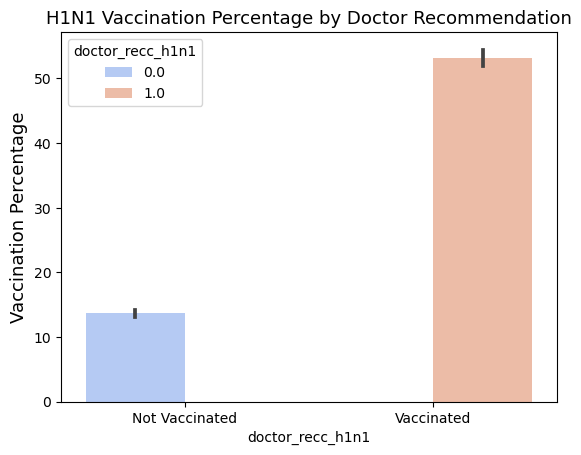

In [24]:


# A graph is created to visualize the relationship between H1N1 vaccination and doctor recommendation
dr = sns.barplot(x=df2['doctor_recc_h1n1'].dropna(), y=df2['h1n1_vaccine']*100, hue=df2['doctor_recc_h1n1'], palette='coolwarm')

# Set the tick positions on the x-axis
dr.set_xticks([0, 1])

# The x-axis tick labels are adjusted to 'Not Vaccinated' and 'Vaccinated'
dr.set_xticklabels(['Not Vaccinated', 'Vaccinated'])

# The y-axis label is set to 'Vaccination Percentage' with a font size of 13
dr.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the graph is set to 'H1N1 Vaccination Percentage by Doctor Recommendation' with a font size of 13
dr.set_title('H1N1 Vaccination Percentage by Doctor Recommendation', fontsize=13)

plt.show()


In [25]:
# A dictionary is created for mapping in order to generate better names for the x-axis in the graphs below
ins_dict = {1: 'Health Insurance',
            0: 'No Health Insurance'}

In [26]:
# The column used to create clear x-axis tick marks in the graph below is created by replacing the health insurance words in 'df2' with the values from 'ins_dict'
df2['health_ins_words'] = df2['health_insurance'].replace(ins_dict)

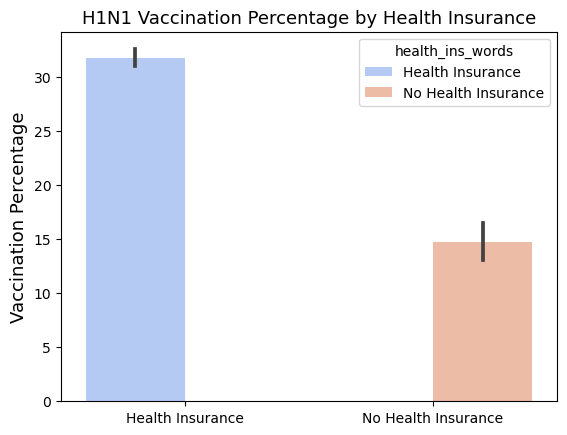

In [29]:

# A bar plot is created to visualize the relationship between health insurance and H1N1 vaccination percentage
ins = sns.barplot(x=df2['health_ins_words'], y=df2['h1n1_vaccine']*100, hue=df2['health_ins_words'], palette='coolwarm')

# The x-axis label is set to empty
ins.set_xlabel('')

# The y-axis label is set to 'Vaccination Percentage' with a font size of 13
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the plot is set to 'H1N1 Vaccination Percentage by Health Insurance' with a font size of 13
ins.set_title('H1N1 Vaccination Percentage by Health Insurance', fontsize=13)

plt.show()


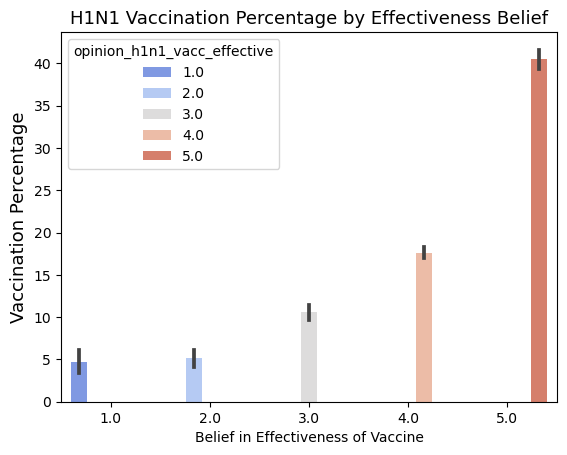

In [31]:
# A graph is created to show the differentiation in vaccine percentage depending on the opinion of effectiveness of H1N1 Vaccine
ins = sns.barplot(x=df2['opinion_h1n1_vacc_effective'].dropna(), y=df2['h1n1_vaccine']*100, hue=df2['opinion_h1n1_vacc_effective'], palette='coolwarm')

# The x-axis label is set to 'Belief in Effectiveness of Vaccine'
ins.set_xlabel('Belief in Effectiveness of Vaccine')

# The y-axis label is set to 'Vaccination Percentage'
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the graph is set to 'H1N1 Vaccination Percentage by Effectiveness Belief'
ins.set_title('H1N1 Vaccination Percentage by Effectiveness Belief', fontsize=13)

plt.show()

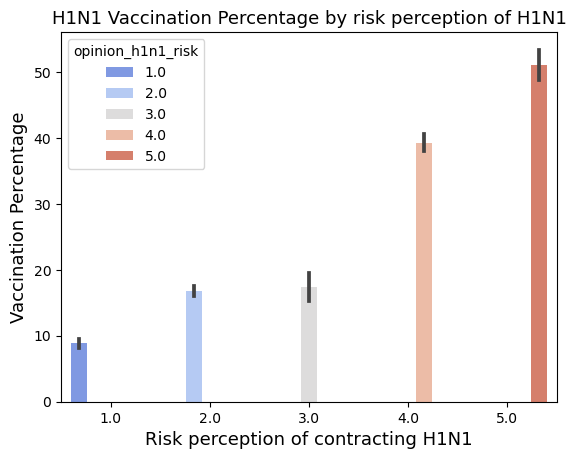

In [33]:
# A risk graph is created to explore vaccine percentage depending on risk perception of H1N1
ins = sns.barplot(x=df2['opinion_h1n1_risk'].dropna(), y=df2['h1n1_vaccine']*100, hue=df2['opinion_h1n1_risk'], palette='coolwarm')

# The x-axis label is set to describe the risk perception of contracting H1N1
ins.set_xlabel('Risk perception of contracting H1N1', fontsize=13)

# The y-axis label is set to describe the vaccination percentage
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the graph is set to describe the relationship between H1N1 vaccination percentage and risk perception of H1N1
ins.set_title('H1N1 Vaccination Percentage by risk perception of H1N1', fontsize=13)

plt.show()